# Spotify Songs Recommendation

### The top songs BY YEAR in the world by spotify. 
### This dataset has several variables about the songs and is based on Billboard

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

In [55]:
df = pd.read_csv("top10s.csv", index_col=0)
df.shape

(603, 14)

In [56]:
df.head()

,title,artist,genre,year,tempo,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [57]:
df.describe()

,year,tempo,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [58]:
df.isnull().sum()

title           0
artist          0
genre           0
year            0
tempo           0
energy          0
danceability    0
loudness        0
liveness        0
valence         0
length          0
acousticness    0
speechiness     0
popularity      0
dtype: int64

In [59]:
dtypes = df.dtypes
numerical_cols = list(dtypes[dtypes != 'object'][1:].index)
categorical = list(dtypes[dtypes == "object"].index)

# Super Categorization of Genre Feature

In [60]:
len(df.genre.unique())

50

In [61]:
for i in df['genre']:
    if 'pop' in i:
        df['genre'] = df['genre'].replace(i, 'pop')
        
    elif 'hip hop' in i:
        df['genre'] = df['genre'].replace(i, 'hip hop')

    elif 'edm' in i:
        df['genre'] = df['genre'].replace(i, 'edm')

    elif 'r&b' in i:
        df['genre'] = df['genre'].replace(i, 'pop')

    elif 'latin' in i:
        df['genre'] = df['genre'].replace(i, 'latin')

    elif 'room' in i:
        df['genre'] = df['genre'].replace(i, 'room')

    elif 'electro' in i:
        df['genre'] = df['genre'].replace(i, 'edm')
        
df['genre'] = df['genre'].replace('chicago rap', 'hip hop')
len(df.genre.unique())

20

In [62]:
df

,title,artist,genre,year,tempo,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,pop,2019,114,79,60,-6,42,24,217,1,7,69


In [63]:
df.to_csv("top10s_final.csv")

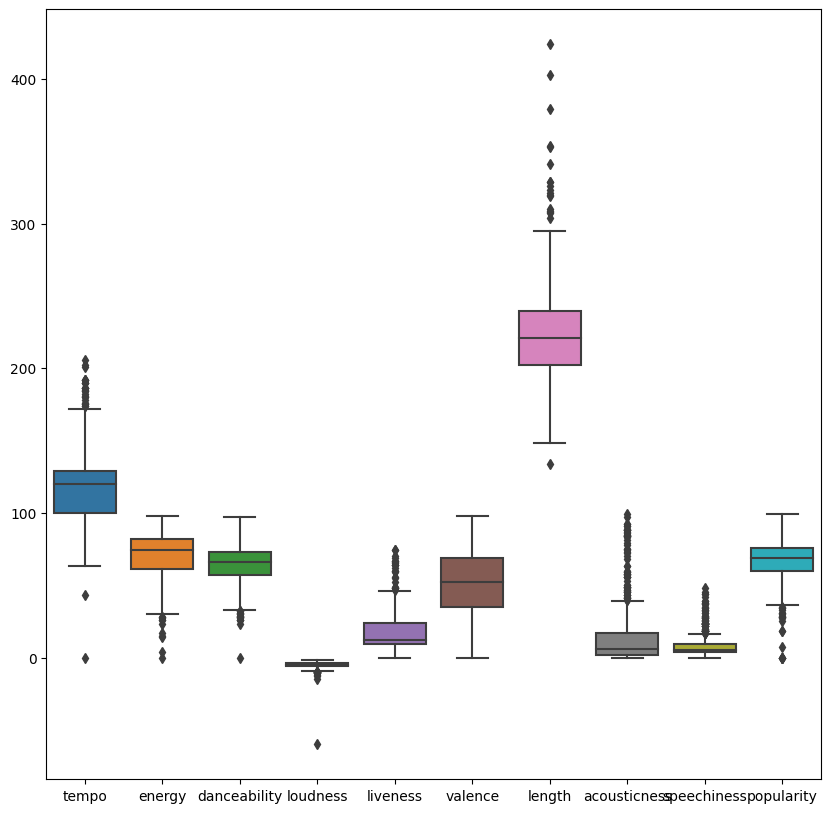

In [42]:
plt.figure(figsize=(10,10))
sns.boxplot(df[numerical_cols])
plt.show()

In [8]:
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    df = df[(df[col] >= ll) & (df[col] <= ul)]
df.shape

(404, 14)

## Frequency Distribution Plots

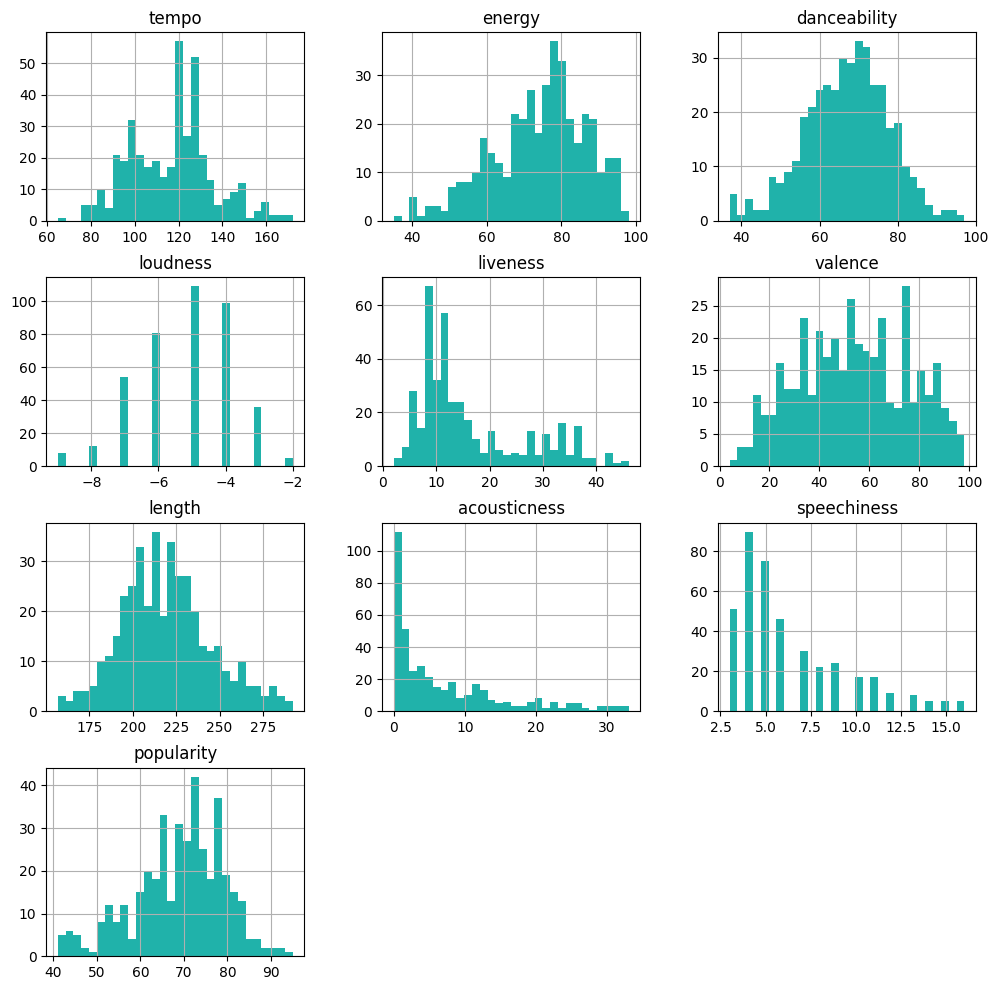

In [9]:
df[['tempo', 'energy', 'danceability', 'loudness', 'liveness', 
    'valence', 'length', 'acousticness','speechiness', 'popularity']].hist(bins=30, figsize = (12,12), color='lightseagreen')
plt.show()

<Figure size 1200x1200 with 0 Axes>

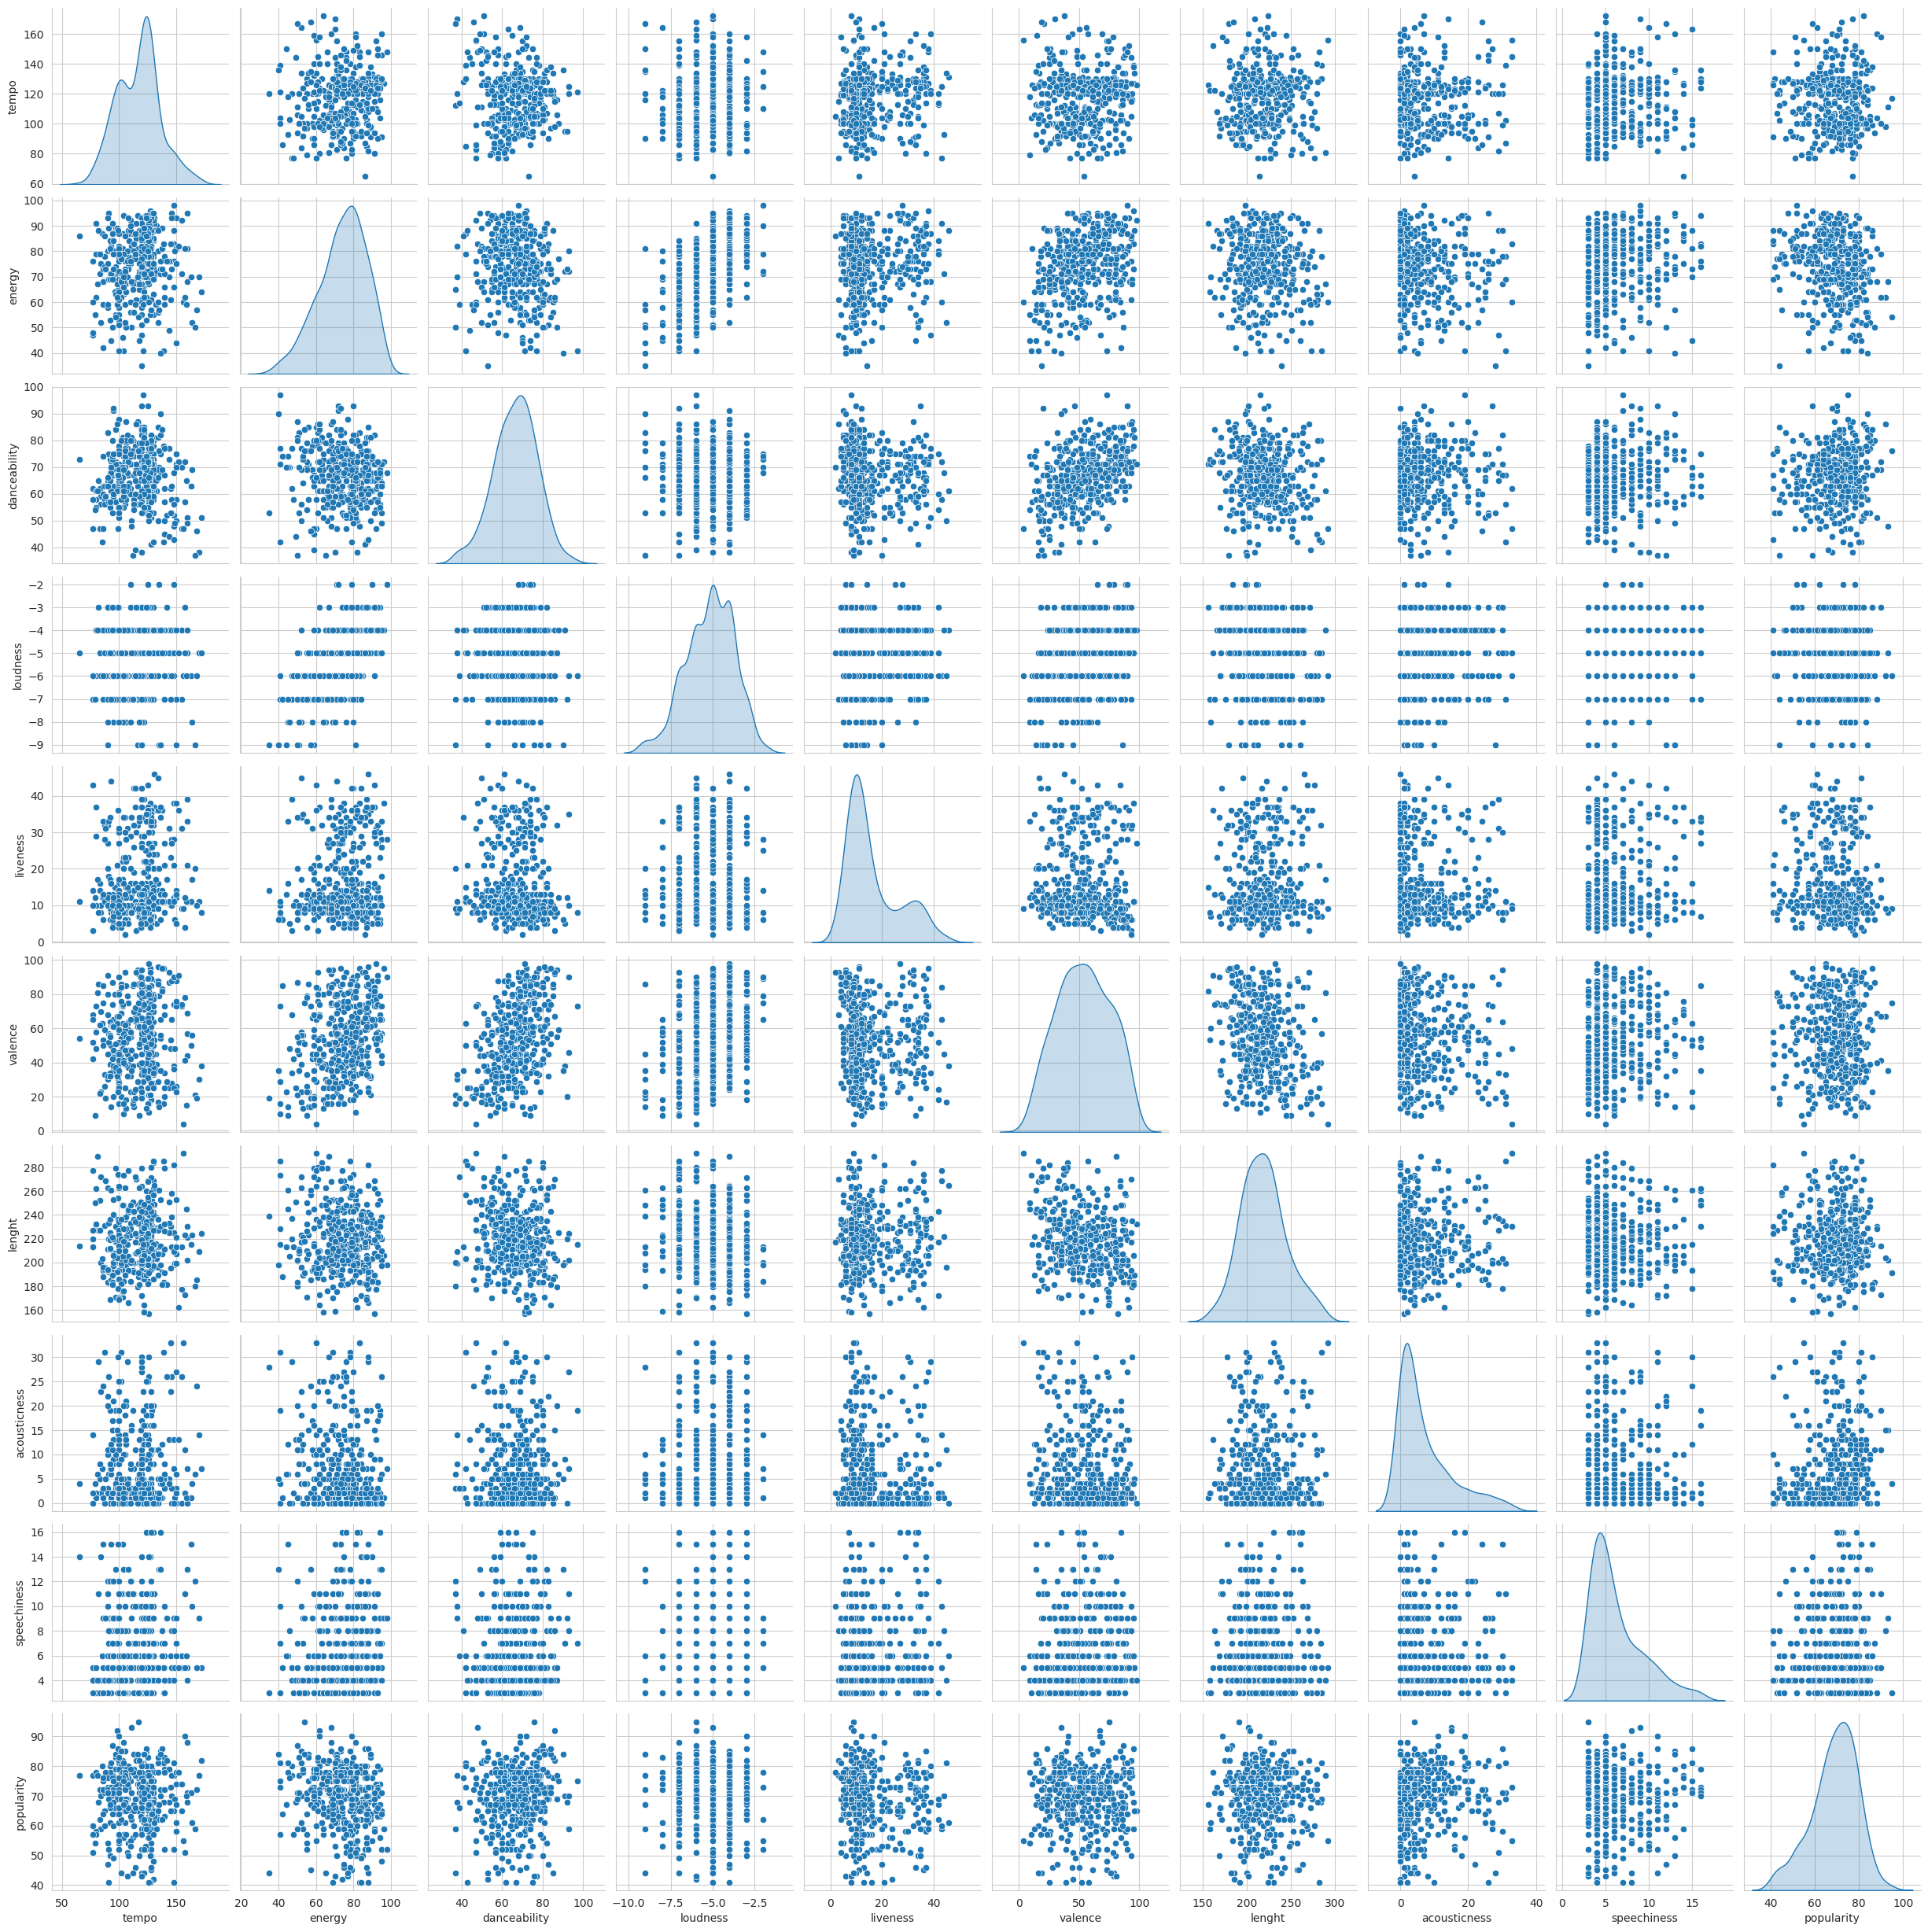

In [10]:
plt.figure(figsize=(12,12))
sns.set_style("whitegrid")
sns.pairplot(df.drop("year", axis=1), diag_kind="kde")
plt.show()